# Logistic回归

"回归"一词源于最佳拟合,表示要找到最佳拟合参数集.训练分类器时的做法就是寻找最佳拟合函数,使用的是最优算法

## 一.Logistic回归和Sigmoid函数

>Logistic回归
<b>优点</b>：计算代价不高,易于理解和实现
<b>缺点</b>：容易欠拟合,分类精度可能不高
<b>适用数据类型</b>：数值型和标称型数据

$$\sigma(z)=\frac{I}{1+e^{-z}}$$

为了实现`Logistic`回归分类器,我们可以在每个特征上都乘以一个回归系数,然后把所有的结果值相加,将这个总和代入`Sigmoid`函数中,进而得到一个范围在0-1之间的数值.任何大于0.5的数据被分人1类,小于0.5即被归入0类

## 二.基于最优化方法的最佳参数确定

### 1.梯度上升法

梯度上升法基于的思想是：要找到某函数的最大值,最好的方法是沿着该函数的梯度方向探寻.如果梯度记为$\nabla$,则函数f(x,y)的梯度由下式表示：
$$
\nabla f(x, y)=\left( \begin{array}{c}{\frac{\partial f(x, y)}{\partial x}} \\ {\frac{\partial f(x, y)}{\partial y}}\end{array}\right)
$$

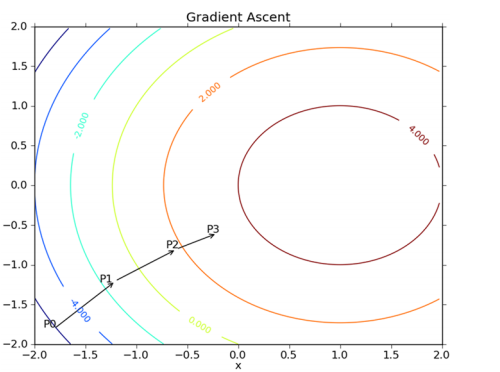

In [1]:
from IPython.display import Image

Image(filename="./data/5_1.png",width=500)

梯度上升算法的迭代公式如下：
$$
w :=w+\alpha \nabla_{\mathbf{w}} f(w)
$$

梯度下降算法的迭代公式如下：
$$
w :=w-\alpha \nabla_{\mathbf{w}} f(w)
$$

<b>梯度上升算法用来求函数的最大值,而梯度下降算法用来求函数的最小值</b>

### 2.训练算法：使用梯度上升找到最佳参数

100个样本点,每个带你包含两个数值型特征：x1和x2

In [18]:
def loadDataset():
    """
    :return: 数据特征矩阵;标签矩阵
    """
    dataMat=[]
    labelMat=[]

    fr=open("./data/testSet.txt")
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [23]:
from numpy import *

def sigmoid(x):
    return 1.0/(1+exp(-x))

In [24]:
def gradAscent(dataMatIn,classLabels):
    """
    :param dataMat: 数据特征矩阵(100*3)
    :param classLabels: 类别标签数组(1*100向量)
    :return: 最佳参数
    """
    
    # 转换成Numpy矩阵数据类型
    dataMatrix=mat(dataMatIn)
    
    # 转成列向量
    labelMat=mat(classLabels).transpose()
    m,n=shape(dataMatrix)
    
    # 步长
    alpha=0.001
    
    # 迭代次数
    maxCycles=500
    weights=ones((n,1))
    
    for k in range(maxCycles):
        
        # 矩阵相乘
        h=sigmoid(dataMatrix*weights)
        error=(labelMat-h)
        weights=weights+alpha*dataMatrix.transpose()*error
        
    return weights

In [25]:
dataArr,labelMat=loadDataset()

In [30]:
weights=gradAscent(dataArr,labelMat)

In [33]:
import matplotlib.pyplot as plt

In [34]:
def plotBestFit(weights):
    """
    :param weights: 最佳参数集
    :return: 分类图像
    """
    dataMat,labelMat=loadDataset()
    dataArr=array(dataMat)
    n=shape(dataArr)[0]
    xcord1=[]
    ycord1=[]
    xcord2=[]
    ycord2=[]
    
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
            
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c="red",marker="s")
    ax.scatter(xcord2,ycord2,s=30,c="green")
    
    x=arange(-3.0,3.0,0.1)
    y=(-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

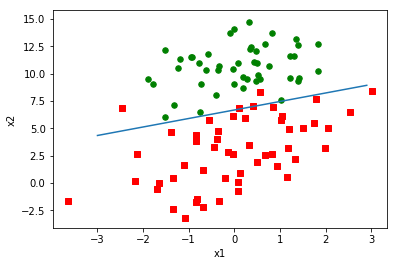

In [36]:
plotBestFit(weights.getA())

### 4.训练算法：随机梯度上升

梯度上升算法在每次更新回归系数时都需要遍历整个数据集,该方法的计算复杂度太高了.另一种改进方法是一次仅用一个样本点来更新回归系数,该方法称为随机梯度上升算法

In [37]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n=shape(dataMatrix)
    alpha=0.01
    weights=ones(n)
    for i in range(m):
        h=sigmoid(sum(dataMatrix[i]*weights))
        error=classLabels[i]-h
        weights=weights+alpha*error*dataMatrix[i]
    return weights

<b>随机梯度上升算法与梯度上升算法区别：</b>
1. 随机梯度下降算法的变量h和误差error都是数值,而梯度上升算法则全是向量
2. 随机梯度下降算法没有矩阵的转换过程,所有变量的数据类型都是Numpy数组

In [38]:
weights=stocGradAscent0(array(dataArr),labelMat)

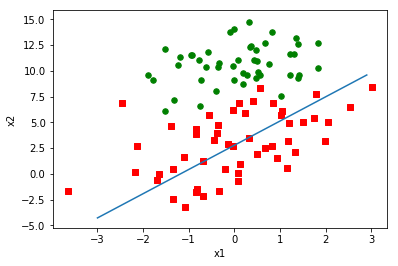

In [39]:
plotBestFit(weights)

使用随机梯度下降算法,分类器错分了三分之一的样本

一个判断优化算法优劣的可靠方法是看它是否收敛,也就是说参数是否到了稳定值

In [51]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n=shape(dataMatrix)
    weights=ones(n)
    for j in range(numIter):
        dataIndex=list(range(m))
        for i in range(m):
            
            # alpha每次迭代时需要调整
            alpha=4/(i+j+1.0)+0.01
            
            # 随机选取更新
            randIndex=int(random.uniform(0,len(dataIndex)))
            h=sigmoid(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [52]:
weights=stoGradAscent1(array(dataArr),labelMat)

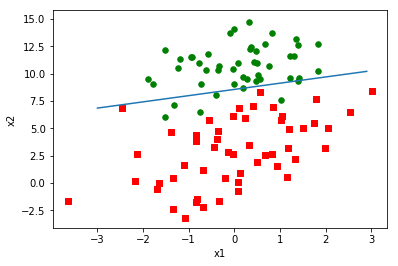

In [53]:
plotBestFit(weights)

默认迭代次数是150,可以通过`stoGradAscent1()`的第3个参数来对此进行修改

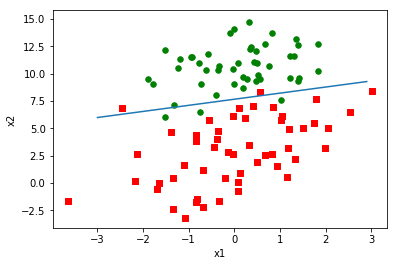

In [54]:
weights=stoGradAscent1(array(dataArr),labelMat,500)
plotBestFit(weights)

## 三.预测马的死亡率

使用`Logistic`回归来预测患有疝病马的存活率.数据集包含300个训练集和68个测试集,每一样本有28个特征

该数据集存在一个十分重要的问题,数据集中有30%的值是缺失的

### 1.准备数据：处理数据中的缺失值

解决缺失值的可选方法：
- 使用可用特征的均值来填补缺失值
- 使用特征值来填补缺失值,如0或-1
- 忽略有缺失值的样本
- 使用相似样本的均值填补缺失值
- 使用另外的机器学习算法预测缺失值

<b>在预处理阶段需要做两件事</b>：
1. 所有的缺失值必须用一个实数值来替换,因为Numpy数据类型不允许包含缺失值
对于这个问题,我们选择实数0来替换所有缺失值,恰好能适用于`Logistic回归`.这样做的直觉在于,需要一个在更新时不会影响系数的值.回归系数的更新公式如下：`weights=weights+alpha*error*dataMatrix[randIndex]`,如果`dataMatrix`的某特征对应值为0,那么该特征的系数将不做更新,即：`weights=weights`.另外由于`sigmoid(0)=0.5`,即它对结果的预测不具有任何倾向性,因此上述做法不会对误差项造成任何影响
2. 如果在测试数据集中发现了一条数据的类别标签已经缺失,那么我们的简单做法是将该条数据丢弃

In [55]:
def classifyVector(x,weights):
    """
    :param x: 回归系数
    :param weights: 特征向量
    :return: 类别
    """

    prob=sigmoid(sum(x*weights))

    if prob>0.5:
        return 1.0
    else:
        return 0.0

In [56]:
def colicTest():
    """
    :return: 错误率
    """
    frTrain=open("./data/horseColicTraining.txt")
    frTest=open("./data/horseColicTest.txt")

    trainingSet=[]
    trainingLabels=[]

    for line in frTrain.readlines():
        currLine=line.strip().split("\t")
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights=stocGradAscent1(array(trainingSet),trainingLabels,500)
    errorCount=0
    numTestVec=0.0

    for line in frTest.readlines():
        numTestVec+=1.0
        currLine=line.strip().split("\t")
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr),trainWeights))!=int(currLine[21]):
            errorCount+=1

    errorRate=(float(errorCount)/numTestVec)
    print("The error rate of this test is:%f"%errorRate)
    return errorRate

In [57]:
def multiTest():
    numTests=10
    errorSum=0.0
    for k in range(numTests):
        errorSum+=colicTest()
    print("After %d iterations the average error rate is:%f"%(numTests,errorSum/float(numTests)))

In [58]:
multiTest()

The error rate of this test is:0.388060
The error rate of this test is:0.373134
The error rate of this test is:0.268657
The error rate of this test is:0.313433
The error rate of this test is:0.298507
The error rate of this test is:0.447761
The error rate of this test is:0.462687
The error rate of this test is:0.358209
The error rate of this test is:0.298507
The error rate of this test is:0.298507
After 10 iterations the average error rate is:0.350746


10次迭代之后的平均错误率为35%.事实上,这个结果对于有30%的数据缺失已经不错了.当然如果调整`colicTest()`中的迭代次数和`stocGradAscent1()`中的步长,平均错误率可以降到20%左右